# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print(spaceship.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [5]:
print(spaceship.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
spaceship= spaceship.dropna()

In [7]:
spaceship["Cabin"] = spaceship["Cabin"].str[0]
spaceship["Cabin"].head()

0    B
1    F
2    A
3    A
4    F
Name: Cabin, dtype: object

In [8]:
spaceship.drop(columns=['PassengerId','Name'],inplace=True)

In [9]:
spaceship = pd.get_dummies(data=spaceship,columns=["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"],dtype=float)

Now perform the same as before:
- Feature Scaling
- Feature Selection


In [10]:
features = spaceship.drop(columns=['Transported'],axis=1)

In [11]:
target = spaceship['Transported'].astype(int)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
knn = KNeighborsClassifier(n_neighbors=10)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
# MODELO SIN ESCALAR
knn_no_scaler = KNeighborsClassifier(n_neighbors=10)
knn_no_scaler.fit(X_train.values, y_train)

y_pred_no_scaler = knn_no_scaler.predict(X_test.values)

print("RESULTADOS SIN ESCALADO")
print("Accuracy:", accuracy_score(y_test, y_pred_no_scaler))
print("\nClassification Report:\n", classification_report(y_test, y_pred_no_scaler))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_no_scaler))

RESULTADOS SIN ESCALADO
Accuracy: 0.783661119515885

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       661
           1       0.80      0.76      0.78       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322


Confusion Matrix:
 [[531 130]
 [156 505]]


In [17]:
#MODELO ESCALADO 
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_dummies = X_train.drop(columns=num_cols).values
X_test_dummies = X_test.drop(columns=num_cols).values

X_train_scaled = np.hstack([X_train_num_scaled, X_train_dummies])
X_test_scaled = np.hstack([X_test_num_scaled, X_test_dummies])

knn_scaled = KNeighborsClassifier(n_neighbors=10)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\nRESULTADOS CON ESCALADO")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))


RESULTADOS CON ESCALADO
Accuracy: 0.7798789712556732

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       661
           1       0.80      0.75      0.77       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322


Confusion Matrix:
 [[537 124]
 [167 494]]


**Perform Train Test Split**

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [19]:
bagging_spaceship = BaggingRegressor(
    DecisionTreeRegressor(max_depth=20),
    n_estimators=500,
    max_samples=1000,    
)

In [20]:
bagging_spaceship.fit(X_train_scaled,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=500)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred = bagging_spaceship.predict(X_test_scaled)

print('MAE', mean_absolute_error(pred, y_test))
print('RMSE', mean_squared_error(pred, y_test))
print('R2 Score', bagging_spaceship.score(X_test_scaled, y_test))

MAE 0.278324677188309
RMSE 0.14245950158825535
R2 Score 0.4301619936469786


- Random Forests

In [24]:
forest_spaceship = RandomForestRegressor(n_estimators=300,max_depth=20)

In [25]:
forest_spaceship.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=20, n_estimators=300)

In [26]:
pred_forest = forest_spaceship.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred_forest, y_test))
print("RMSE", mean_squared_error(pred_forest, y_test,))
print("R2 score", forest_spaceship.score(X_test_scaled, y_test))

MAE 0.2687759749173405
RMSE 0.14545901775790845
R2 score 0.4181639289683662


- Gradient Boosting

In [27]:
gb_spaceship = GradientBoostingRegressor(max_depth=20,n_estimators=100)




In [28]:
gb_spaceship.fit(X_train_scaled,y_train)

GradientBoostingRegressor(max_depth=20)

In [29]:
pred_gb = gb_spaceship.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred_gb, y_test))
print("RMSE", mean_squared_error(pred_gb, y_test))
print("R2 score", gb_spaceship.score(X_test_scaled, y_test))

MAE 0.26099557423582787
RMSE 0.18100927209093104
R2 score 0.27596291163627584


- Adaptive Boosting

In [30]:
ada_spaceship = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators = 100)

In [31]:
ada_spaceship.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [32]:
pred_ada = ada_spaceship.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred_ada, y_test))
print("RMSE", mean_squared_error(pred_ada, y_test))
print("R2 score", ada_spaceship.score(X_test_scaled, y_test))

MAE 0.2413721689501113
RMSE 0.1820655340543147
R2 score 0.27173786378274123


In [33]:
#XGBOOST
#!pip install xgboost

from xgboost import XGBRegressor

In [34]:
xgb = XGBRegressor(n_estimators=100,max_depth=20)

In [35]:
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
pred_xgb = xgb.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred_xgb, y_test))
print("RMSE", mean_squared_error(pred_xgb, y_test))
print("R2 score", xgb.score(X_test_scaled, y_test))

MAE 0.2653917074203491
RMSE 0.16527117788791656
R2 score 0.33891528844833374


Which model is the best and why?

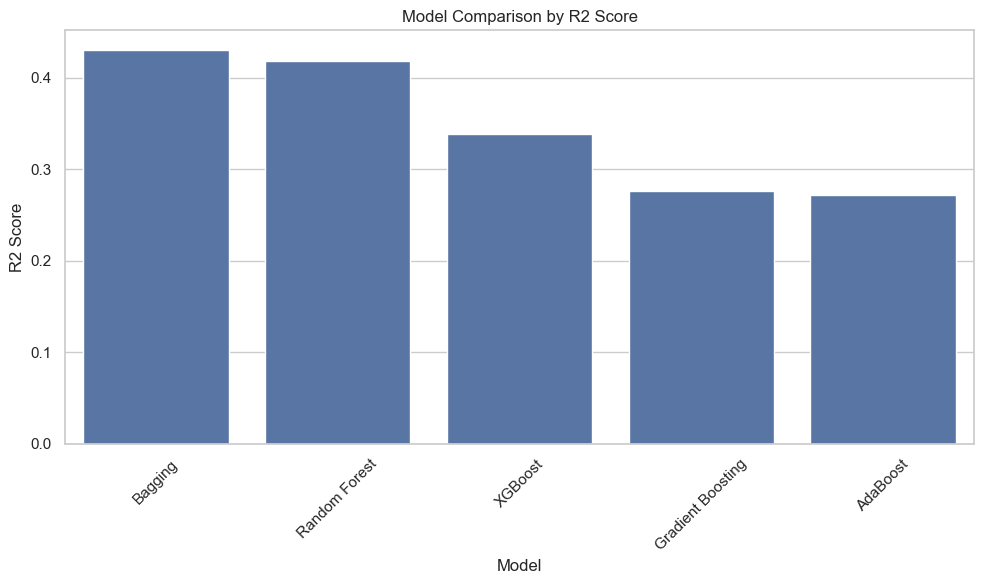

In [38]:
#which model is the best?
models = {
    "Bagging": bagging_spaceship,
    "Random Forest": forest_spaceship,
    "Gradient Boosting": gb_spaceship,
    "AdaBoost": ada_spaceship,
    "XGBoost": xgb
}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
results = {}
for name, model in models.items():
    pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(pred, y_test)
    rmse = mean_squared_error(pred, y_test)
    r2 = model.score(X_test_scaled, y_test)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R2", data=results_df)
plt.title("Model Comparison by R2 Score")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()